Importing the data from https://github.com/CSSEGISandData/COVID-19

In [16]:
import pandas as pd
cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


Cleaning data

In [63]:
confirmed_cases_kenya = cases[cases['Country/Region'] == 'Kenya']
columns = confirmed_cases_kenya.columns
columns = columns.drop(["Country/Region", "Province/State", "Lat", "Long"])
confirmed_cases_kenya = confirmed_cases_kenya.melt(id_vars=['Country/Region'], value_vars=columns, value_name="Cases", var_name="Date")
confirmed_cases_kenya = confirmed_cases_kenya.set_index('Date')
confirmed_cases_kenya.tail()

,Country/Region,Cases
Date,,
3/25/20,Kenya,28
3/26/20,Kenya,31
3/27/20,Kenya,31
3/28/20,Kenya,38
3/29/20,Kenya,42


Plotting the data

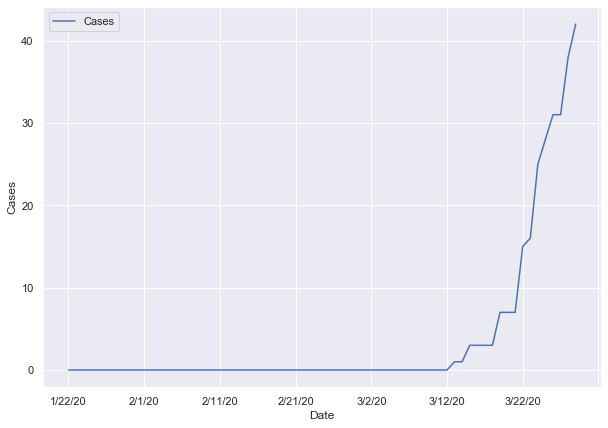

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

confirmed_cases_kenya.plot(figsize=(10,7))
plt.ylabel('Cases')
plt.xlabel('Date')
plt.show()